In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

## Load the dataset

In [2]:
os.listdir()

['Untitled Folder',
 '.DS_Store',
 'Students_Social_Media_Addiction.csv',
 'Python Mini Project - Social Media Combat.pdf',
 '1Social_media_Project.ipynb.zip',
 '.ipynb_checkpoints',
 '1Social_media_Project.ipynb']

In [3]:
df = pd.read_csv('Students_Social_Media_Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


### Handle missing values, if any

In [6]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [13]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


### For understanding the data type and Columns 

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

## Functions, Loops, and Conditionals

### Classify risk level (Low/Medium/High) based on usage hours

In [15]:
def risk_level(s):
    if s>=0 and s<3:
        return 'Low'
    elif s>=3 and s<4:
        return 'Medium'
    else:
        return 'High'

In [16]:
# Apply the function to create a new column based on Avg_Daily_Usage_Hours
df['Risk_level_Usage_hours'] = df.apply(lambda x : risk_level(x['Avg_Daily_Usage_Hours']),axis=1)

In [17]:
df['Risk_level_Usage_hours'].value_counts()
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Risk_level_Usage_hours
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,High
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Low
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,High
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Medium
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,High
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,High
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,High
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,High


### detox suggestion function 

In [18]:
def detox_stratiges(s):
    if s =="Low":
        return "Maintain current digital habits and ensure regular breaks."
    elif s =="Medium":
        return "Schedule device-free hours each day; try digital-free dinners."
    else:
        return "Consider a weekend digital detox; turn off non-essential notifications; set screen time limits."

In [19]:
df['Detox_Strategies']= df.apply(lambda x: detox_stratiges(x['Risk_level_Usage_hours']),axis=1)

In [20]:
df['Detox_Strategies'].unique()
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Risk_level_Usage_hours,Detox_Strategies
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,High,Consider a weekend digital detox; turn off non...
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Low,Maintain current digital habits and ensure reg...
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,High,Consider a weekend digital detox; turn off non...
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Medium,Schedule device-free hours each day; try digit...
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,High,Consider a weekend digital detox; turn off non...


##  Aggregation & Insights

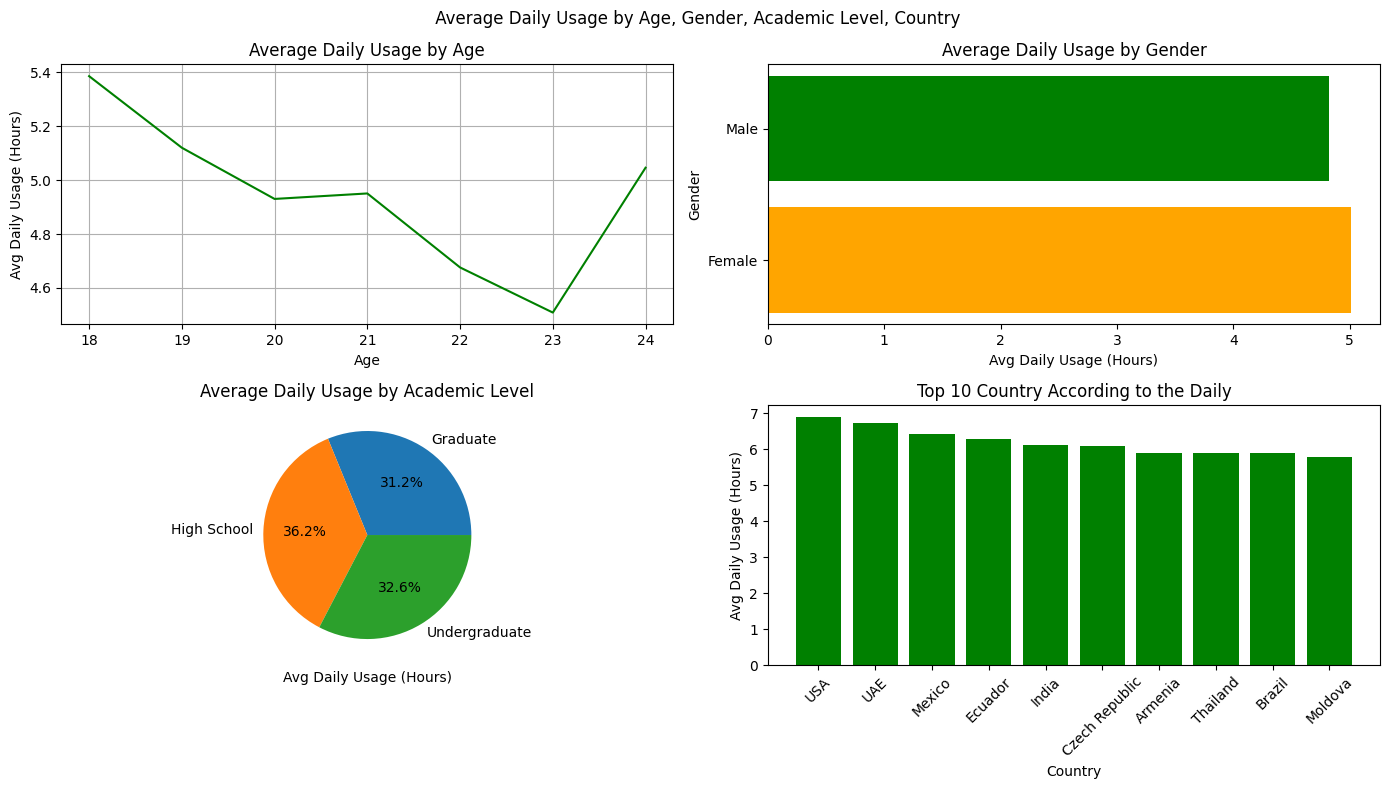

In [67]:

# 1. Average Daily Usage by Age, Gender, Academic Level, Country
df_avg_usage_age = df.groupby('Age')['Avg_Daily_Usage_Hours'].mean().reset_index()


df_avg_usage_gender = df.groupby('Gender')['Avg_Daily_Usage_Hours'].mean().reset_index()


df_avg_usage_academic= df.groupby('Academic_Level')['Avg_Daily_Usage_Hours'].mean().reset_index()


df_avg_usage_country = df.groupby('Country')['Avg_Daily_Usage_Hours'].mean().reset_index().sort_values(by='Avg_Daily_Usage_Hours',ascending = False).head(10)

# avg daily Usage by Age
fig,axs = plt.subplots(2,2 , figsize = (14,8))
fig.suptitle(" Average Daily Usage by Age, Gender, Academic Level, Country")
axs[0,0].plot(df_avg_usage_age['Age'],df_avg_usage_age['Avg_Daily_Usage_Hours'],color='Green')
axs[0,0].set_title("Average Daily Usage by Age")
axs[0,0].set_xlabel("Age")
axs[0,0].set_ylabel("Avg Daily Usage (Hours)")
axs[0,0].grid(True)

#Avg Daily Usage by Gender 
axs[0,1].barh(df_avg_usage_gender['Gender'],df_avg_usage_gender['Avg_Daily_Usage_Hours'],color=['orange','Green'])
axs[0,1].set_title("Average Daily Usage by Gender")
axs[0,1].set_xlabel("Avg Daily Usage (Hours)")
axs[0,1].set_ylabel("Gender")

# Avg Daily Usage by Academic 
axs[1,0].pie(df_avg_usage_academic['Avg_Daily_Usage_Hours'],
             labels=df_avg_usage_academic['Academic_Level'],
    autopct='%1.1f%%')
axs[1,0].set_title('Average Daily Usage by Academic Level')
axs[1,0].set_xlabel("Avg Daily Usage (Hours)")

#Avg Daily Usage by Country 
axs[1,1].bar(df_avg_usage_country['Country'],df_avg_usage_country['Avg_Daily_Usage_Hours'],color='green')
axs[1,1].set_title("Top 10 Country According to the Daily")
axs[1,1].set_xlabel("Country")
axs[1,1].set_ylabel("Avg Daily Usage (Hours)")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


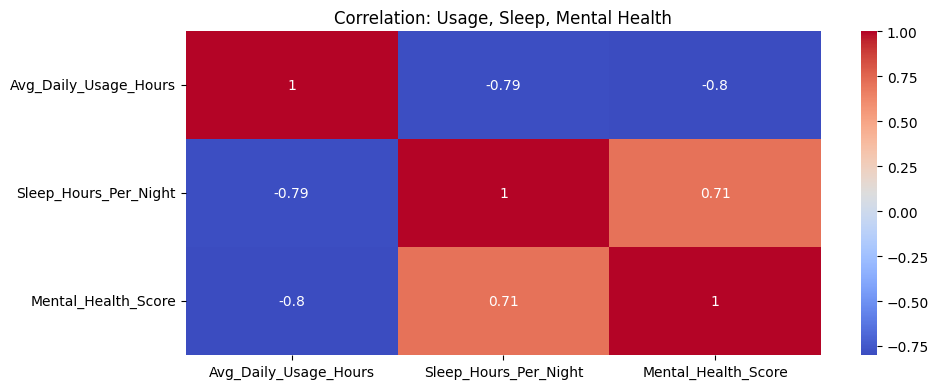


 Correlation between sleep and Daily Usage : -0.7905824554799915
 We get Strong Negative Correlation bewteen Sleep and Daily Usage.
 Which Means If students increase the Avg_Daily_Usage_Hours they tends to be decrease the Sleep_Hours_Per_Night

 Correlation between Mental Health and Daily Usage : -0.8010576231623431
 We get strong Negative Correlation Between Mental Health and Daily Usage.
 Which Means If Students increase the Screen time they tend to be decrease their mental Health


In [38]:
#  Sleep & Mental Health: Correlation heatmap
corr = df[['Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night','Mental_Health_Score']].corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Usage, Sleep, Mental Health')
plt.tight_layout()
plt.show()

df_sleep_avg_usage = df['Sleep_Hours_Per_Night'].corr(df['Avg_Daily_Usage_Hours']) # we Use corr for campare the numeric columns 
print(f'\n Correlation between sleep and Daily Usage : {df_sleep_avg_usage}')
print(" We get Strong Negative Correlation bewteen Sleep and Daily Usage.\n Which Means If students increase the Avg_Daily_Usage_Hours they tends to be decrease the Sleep_Hours_Per_Night")

df_mental_health_daily_usage = df['Mental_Health_Score'].corr(df['Avg_Daily_Usage_Hours'])
print(f'\n Correlation between Mental Health and Daily Usage : {df_mental_health_daily_usage}')
print(" We get strong Negative Correlation Between Mental Health and Daily Usage.\n Which Means If Students increase the Screen time they tend to be decrease their mental Health")


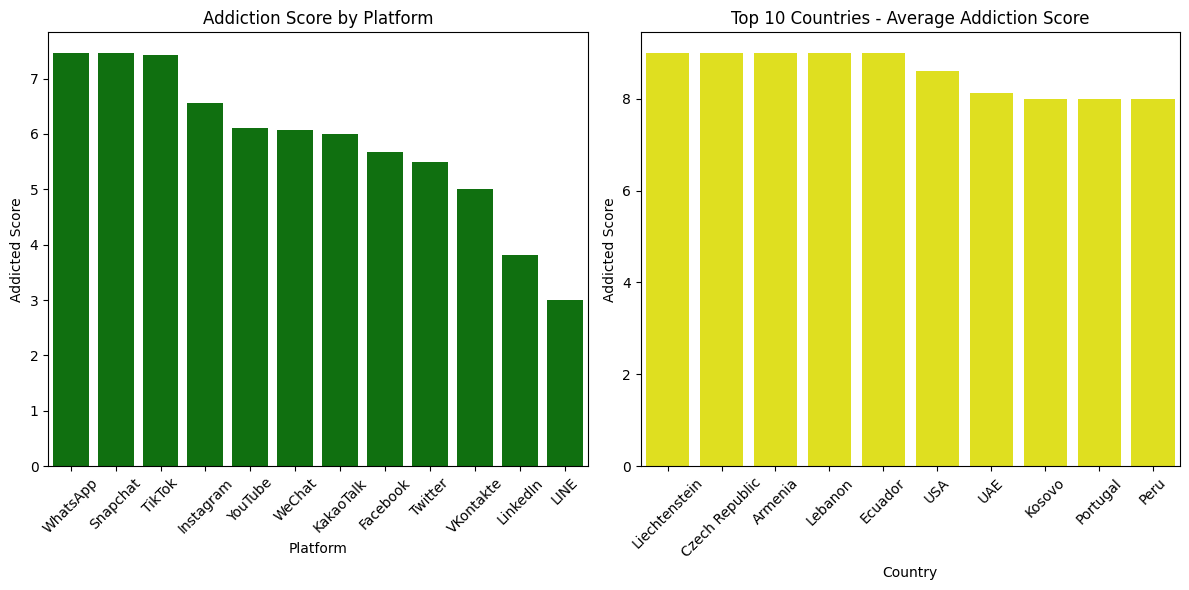

In [88]:

df_country_addiction = df.groupby('Country')['Addicted_Score'].mean().reset_index().sort_values('Addicted_Score', ascending=False).head(10)

df_addiction_platform = (df.groupby('Most_Used_Platform')['Addicted_Score'].mean()
                         .reset_index().sort_values(by='Addicted_Score',ascending=False))


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Platform-based addiction scores 
sns.barplot(x='Most_Used_Platform', y='Addicted_Score', data=df_addiction_platform, ax=axs[0],color='Green')
axs[0].set_title('Addiction Score by Platform')
axs[0].set_xlabel('Platform')
axs[0].set_ylabel('Addicted Score')
axs[0].tick_params(axis='x', rotation=45)

# Country-based addiction scores
sns.barplot(x='Country', y='Addicted_Score', data=df_country_addiction, ax=axs[1],color='yellow')
axs[1].set_title('Top 10 Countries - Average Addiction Score')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Addicted Score')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Insight

1. The dataset comprises 705 student respondents from 
different academic levels and 30+ countries and ages ranging 18–24. 

2. Students report an average of 4.92 hours per day on social media
usage spans 1.5–8.5 hours (IQR) , with (Q1) 25% using under 4.1 hours and (Q3) 75% over 5.8 hours.

3. Average nightly sleep is 6.87 hours, but heavier social media users tend to decrease sleeping durations.

4. Female students (52%) report slightly higher average Addiction Scores (6.5) than male students (6.3), despite males averaging 0.2 more daily usage hours.

5. Spending more time daily on social media is strongly linked to both getting less sleep and experiencing poorer mental health among students in this analysis.

6. Top 10 countries by average addiction score include Liechtenstein, Czech Republic, Armenia,lebanon,USA etc. indicating global reach of problematic use.

7. Whatsapp,snapchat,tiktok,instagram these platform shows the hightest avg addiction score amoung the others. 